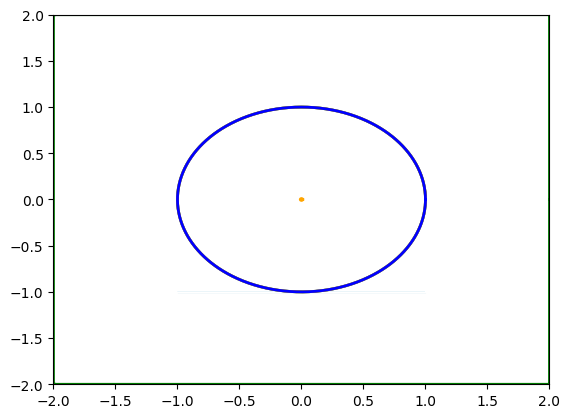

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f1(t):
    x = 2*np.cos(2*np.pi*t)  # Define the x-component of f
    y = 2*np.sin(2*np.pi*t)  # Define the y-component of f
    return np.array([x, y])  # Return the 2D vector [x, y]

def f2(t):
    x = np.cos(2*np.pi*t)  # Define the x-component of f
    y = np.sin(2*np.pi*t)  # Define the y-component of f
    return np.array([x, y])  # Return the 2D vector [x, y]


# Define the homotopy functions F(t, s) and G(t, s)
def F(t, s):
    max_val = np.maximum(np.abs(np.cos(2*np.pi*t)), np.abs(np.sin(2*np.pi*t)))
    x = ((1 - s) * (f1(t)[0] / max_val) + s * f2(t)[0])
    y = ((1 - s) * (f1(t)[1] / max_val) + s * f2(t)[1])
    return x, y


def G(t, s):
    x = s * np.cos(2*np.pi*t) + (1 - s) * (1/100) * np.cos(2*np.pi*t)
    y = s * np.sin(2*np.pi*t) + (1 - s) * (1/100) * np.sin(2*np.pi*t)
    return x, y

# Define the range of t values
t = np.linspace(0, 1, 1000)

# Define the range of s values for animation
s_values = np.linspace(0, 1, 80)

# Create a figure and axis for the animation and static plots
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
line_anim_F, = ax.plot([], [], color='green', lw=2)
line_anim_G, = ax.plot([], [], color='orange', lw=2)
line_static_F, = ax.plot([], [], color='green', lw=2)
line_static_G, = ax.plot([], [], color='orange', lw=2)
line_static_h2, = ax.plot([], [], color='blue', lw=2)

# Animation update function
def update(frame):
    s = s_values[frame]
    x_F, y_F = F(t, s)
    x_G, y_G = G(t, s)
    line_anim_F.set_data(x_F, y_F)
    line_anim_G.set_data(x_G, y_G)
    line_static_F.set_data(F(t, 0))
    line_static_G.set_data(G(t, 0))
    line_static_h2.set_data(F(t, 1))
    ax.relim()
    ax.autoscale_view()

    # Clear previous filled areas
    ax.collections.clear()

    # Fill the area inside the animated green plot with light blue
    ax.fill_between(x_F, y_F, y2=np.min(y_F), color='lightblue')

    # Fill the area inside the animated orange plot with white
    ax.fill_between(x_G, y_G, y2=np.min(y_G), color='white')

    return line_anim_F, line_anim_G, line_static_F, line_static_G, line_static_h2

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(s_values), interval=1000/10, blit=True)

# Display the animation
HTML(ani.to_jshtml())

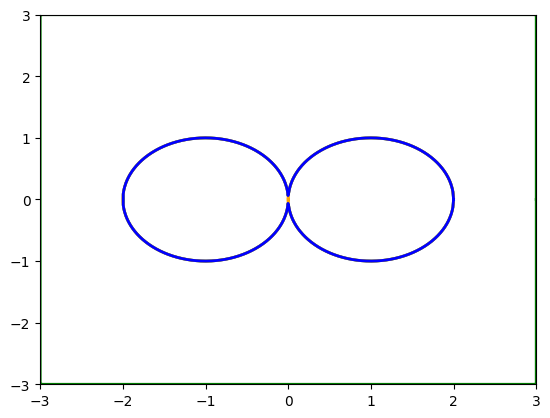

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f1(t):
    x = 3*np.cos(2*np.pi*t)  # Define the x-component of f
    y = 3*np.sin(2*np.pi*t)  # Define the y-component of f
    return np.array([x, y])  # Return the 2D vector [x, y]

def f2(t):
    x = 2*np.cos(2*np.pi*t)  # Define the x-component of f
    y = 2*np.sin(2*np.pi*t)  # Define the y-component of f
    return np.array([x, y])  # Return the 2D vector [x, y]


# Define the homotopy functions F(t, s) and G(t, s)
def F1(t, s):
    max_val = np.maximum(np.abs(np.cos(2*np.pi*t)), np.abs(np.sin(2*np.pi*t)))
    x = ((1 - s) * (f1(t)[0] / max_val) + s * f2(t)[0])
    y = ((1 - s) * (f1(t)[1] / max_val) + s * f2(t)[1])
    return x, y


def g1(t):
    x = np.where(t <= 0.5, 2 - 8 * t, 8 * t - 6)
    y = np.sqrt(4 - x**2) * np.where(t <= 0.5, 1, -1)
    return np.array([x, y])  # Return the 2D vector [x, y]

def g2(t):
    x = np.where(t <= 0.5, 2 - 8 * t, 8 * t - 6)
    y = np.where(t <= 0.25, np.sqrt(1 - (x-1)**2),np.where(t <= 0.5, np.sqrt(1 - (1+x)**2), np.where(t <= 0.75, -np.sqrt(1 - (x+1)**2), -np.sqrt(1 - (x-1)**2))))
    return x, y

    return np.array([x, y])  # Return the 2D vector [x, y]


def g3(t):
    x = np.cos(2*np.pi*t)
    y = np.sin(2*np.pi*t)
   
    return x, y

   # return np.array([x, y])  # Return the 2D vector [x, y]

# Define the homotopy functions F(t, s) and G(t, s)
def F2(t, s):
    x = ((1 - s) * (g1(t)[0]) + s * g2(t)[0])
    y = ((1 - s) * (g1(t)[1]) + s * g2(t)[1])
    return x, y

def F(t, s):
    x = np.where(s <= 0.5, F1(t,2*s)[0], F2(t,2*s-1)[0]) 
    y = np.where(s <= 0.5, F1(t,2*s)[1], F2(t,2*s-1)[1])
    return x, y

def G1(t, s):
    x = s * (g3(t)[0])+1
    y = s * (g3(t)[1])
    return x, y

def G2(t, s):
    x = s * (g3(t)[0])-1
    y = s * (g3(t)[1])
    return x, y

# Define the range of t values
t = np.linspace(0, 1, 1000)

# Define the range of s values for animation
s_values = np.linspace(0, 1, 80)

# Create a figure and axis for the animation and static plots
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
line_anim_F, = ax.plot([], [], color='green', lw=2)
line_anim_G1, = ax.plot([], [], color='orange', lw=2)
line_anim_G2, = ax.plot([], [], color='orange', lw=2)
line_static_F, = ax.plot([], [], color='green', lw=2)
# line_static_G, = ax.plot([], [], color='red', lw=2)
line_static_h2, = ax.plot([], [], color='blue', lw=2)

# Animation update function
def update(frame):
    s = s_values[frame]
    x_F, y_F = F(t, s)
    x_G1, y_G1 = G1(t, s)
    x_G2, y_G2 = G2(t, s)
    line_anim_F.set_data(x_F, y_F)
    line_anim_G1.set_data(x_G1, y_G1)
    line_anim_G2.set_data(x_G2, y_G2)
    line_static_F.set_data(F(t, 0))
    # line_static_G.set_data(G(t, 0))
    line_static_h2.set_data(F(t, 1))
    ax.relim()
    ax.autoscale_view()
    return line_anim_F, line_anim_G1, line_anim_G2, line_static_F, line_static_h2

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(s_values), interval=1000/10, blit=True)

# Display the animation
HTML(ani.to_jshtml())